Import libraries

In [1]:
import requests
import time
import pandas as pd

In [2]:
url = "https://www.reddit.com/r/dating_advice.json"

Set a username so Reddit knows I'm not a hacker.

In [3]:
headers = {'User-agent': "not-robot-rachel"}

In [4]:
res = requests.get(url, headers=headers)

Check for a good status code.  Should be 200.

In [5]:
res.status_code

200

In [6]:
date_json = res.json()

In [7]:
sorted(date_json.keys())

['data', 'kind']

In [8]:
sorted(date_json['data'].keys())

['after', 'before', 'children', 'dist', 'modhash']

In [9]:
len(date_json['data']['children'])

27

In [10]:
date_json['data']['children'][1]['data']

{'approved_at_utc': None,
 'subreddit': 'dating_advice',
 'selftext': "Welcome to /r/dating_advice. Please use this daily free-for-all thread to ask for advice, rant and rave, share something you've learned about dating, and help people.\n\nRemember our [rules](https://www.reddit.com/r/dating_advice/about/rules/), be sure to include ages and genders if you need help with a specific situation.\n\nReport any rule violations using the report button. Thanks!",
 'author_fullname': 't2_6l4z3',
 'saved': False,
 'mod_reason_title': None,
 'gilded': 0,
 'clicked': False,
 'title': 'Daily Free-for-all Discussion- July 11, 2019',
 'link_flair_richtext': [],
 'subreddit_name_prefixed': 'r/dating_advice',
 'hidden': False,
 'pwls': 6,
 'link_flair_css_class': None,
 'downs': 0,
 'hide_score': False,
 'name': 't3_cbv1ia',
 'quarantine': False,
 'link_flair_text_color': 'dark',
 'author_flair_background_color': None,
 'subreddit_type': 'public',
 'ups': 3,
 'total_awards_received': 0,
 'media_embed'

In [11]:
pd.DataFrame(date_json['data']['children']).head()

,data,kind
0,"{'approved_at_utc': None, 'subreddit': 'dating...",t3
1,"{'approved_at_utc': None, 'subreddit': 'dating...",t3
2,"{'approved_at_utc': None, 'subreddit': 'dating...",t3
3,"{'approved_at_utc': None, 'subreddit': 'dating...",t3
4,"{'approved_at_utc': None, 'subreddit': 'dating...",t3


In [12]:
date_json['data']['after']

[post['data']['name'] for post in date_json['data']['children']]

['t3_c5gnfz',
 't3_cbv1ia',
 't3_cc01ey',
 't3_cbthj7',
 't3_cbvmr8',
 't3_cbxuwt',
 't3_cc18ku',
 't3_cbxqpb',
 't3_cbyx8u',
 't3_cc0odh',
 't3_cbkrr0',
 't3_cbt0oc',
 't3_cbxo40',
 't3_cbxjli',
 't3_cbwyw3',
 't3_cbrd7c',
 't3_cbvnj3',
 't3_cc15d9',
 't3_cbztjj',
 't3_cbzbua',
 't3_cc0fu0',
 't3_cbz0pj',
 't3_cc06qw',
 't3_cc01qg',
 't3_cc1ppg',
 't3_cc1p2b',
 't3_cbuj9u']

In [13]:
param = {'after': 't3_ca8aa4'}

In [14]:
requests.get(url, params=param, headers=headers)

<Response [200]>

Let's scrape some posts!

In [15]:
posts = []
after = None
for i in range(39):
    print(i)
    if after == None:
        params = {}
    else:
        params = {'after': after}
    url = "https://www.reddit.com/r/dating_advice.json"
    res = requests.get(url, params=params, headers=headers)
    if res.status_code == 200:
        date_json = res.json()
        
        for post in date_json['data']['children']:
            posts.append(post['data'])
        after = date_json['data']['after']
    else:
        print(res.status_code)
        break
        
    print('Current Scrape:')
    print(f"{len(date_json['data']['children'])} posts scraped for a total of {len(posts)}")
    print(f"Current after:{after}")
    time.sleep(1)

0
Current Scrape:
27 posts scraped for a total of 27
Current after:t3_cbuj9u
1
Current Scrape:
25 posts scraped for a total of 52
Current after:t3_cbsh2j
2
Current Scrape:
25 posts scraped for a total of 77
Current after:t3_cbvwgv
3
Current Scrape:
25 posts scraped for a total of 102
Current after:t3_cbygqp
4
Current Scrape:
25 posts scraped for a total of 127
Current after:t3_cbwjcz
5
Current Scrape:
25 posts scraped for a total of 152
Current after:t3_cbrdoi
6
Current Scrape:
25 posts scraped for a total of 177
Current after:t3_cbst8f
7
Current Scrape:
25 posts scraped for a total of 202
Current after:t3_cbrf4v
8
Current Scrape:
25 posts scraped for a total of 227
Current after:t3_cbpqd4
9
Current Scrape:
25 posts scraped for a total of 252
Current after:t3_cbennp
10
Current Scrape:
25 posts scraped for a total of 277
Current after:t3_cbnf57
11
Current Scrape:
25 posts scraped for a total of 302
Current after:t3_cbj2fi
12
Current Scrape:
25 posts scraped for a total of 327
Current af

In [16]:
len(posts)

963

In [17]:
df = pd.DataFrame(posts)

In [18]:
df[['author', 'title', 'selftext']].head()

,author,title,selftext
0,TheYellowRose,[SERIOUS] What are some good ways to build up ...,
1,AutoModerator,"Daily Free-for-all Discussion- July 11, 2019",Welcome to /r/dating_advice. Please use this d...
2,throwaway1374758596,I (22m) am going on my first date EVER in the ...,"I have never been on a real date, I asked this..."
3,atlxs_,How do you approach a girl you want to talk to...,
4,whoaqua1234,Are there any podcasts out there for singles a...,Looking for something uplifting *


In [19]:
df.shape

(963, 98)

In [20]:
df.columns

Index(['all_awardings', 'allow_live_comments', 'approved_at_utc',
       'approved_by', 'archived', 'author', 'author_cakeday',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'banned_at_utc', 'banned_by',
       'can_gild', 'can_mod_post', 'category', 'clicked', 'content_categories',
       'contest_mode', 'created', 'created_utc', 'crosspost_parent',
       'crosspost_parent_list', 'discussion_type', 'distinguished', 'domain',
       'downs', 'edited', 'gilded', 'gildings', 'hidden', 'hide_score', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'likes', 'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_text', 'link_flair_text_color',
 

In [21]:
df['id'].value_counts().head()

caujok    1
cbq7m9    1
cazall    1
cauoep    1
cbugfp    1
Name: id, dtype: int64

In [22]:
df['created_utc'].head()

0    1.561502e+09
1    1.562847e+09
2    1.562873e+09
3    1.562836e+09
4    1.562851e+09
Name: created_utc, dtype: float64

Convert column with time created information to be more readable.

In [23]:
df['timestamp'] = pd.to_datetime(df['created_utc'], unit='s')

In [24]:
df['timestamp'].head()

0   2019-06-25 22:28:55
1   2019-07-11 12:14:52
2   2019-07-11 19:26:03
3   2019-07-11 09:04:48
4   2019-07-11 13:20:14
Name: timestamp, dtype: datetime64[ns]

In [25]:
df['subreddit'].unique()

array(['dating_advice'], dtype=object)

In [26]:
df['num_comments'].head()

0     61
1      4
2     60
3    107
4     74
Name: num_comments, dtype: int64

In [27]:
df['ups'].head()

0    133
1      3
2    258
3    641
4    234
Name: ups, dtype: int64

Make a new DataFrame with only the columns I think are important.  
See data dictionary for details.

In [28]:
dating = df[['id', 'author', 'title', 'selftext', 'timestamp', 'num_comments', 'ups', 'subreddit']]

In [29]:
dating.shape

(963, 8)

In [30]:
%ls

README.md                         reddit-NLP.ipynb
datasets/                         relationship-advice-scrape.ipynb
dating-advice-scrape.ipynb


Save to csv.

In [31]:
# dating.to_csv('dating.csv')
#commented out so as to not override when the notebook is rerun.

In [33]:
pd.read_csv('datasets/dating.csv')

,Unnamed: 0,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,0,c5gnfz,TheYellowRose,[SERIOUS] What are some good ways to build up ...,NaN,2019-06-25 22:28:55,52,104,dating_advice
1,1,c9sy1z,AutoModerator,"Daily Free-for-all Discussion- July 06, 2019",Welcome to /r/dating_advice. Please use this d...,2019-07-06 12:13:58,1,4,dating_advice
2,2,ca6n6n,C0nfusedGiirl,I hate when guys didn't respond and left me gu...,That's getting annoyed and time-wasting!\n\nI ...,2019-07-07 13:08:02,123,348,dating_advice
3,3,ca8zs0,thatviolabinch,"To the right person, you will perfectly make s...","I guess this is kind of obvious, but I wanted ...",2019-07-07 16:56:26,6,52,dating_advice
4,4,c9xmsw,Raziasaur,If you have an unreciprocated crush on a frien...,I can’t tell you how many friendships have bee...,2019-07-06 19:34:47,162,2237,dating_advice
5,5,ca7oll,Sharptheavenger28,I had to break it off. (26m) (23f),"Long story short, I met her through a mutual f...",2019-07-07 14:56:00,28,55,dating_advice
6,6,ca6fmh,spoonlicker3000,Men that were really nervous before talking to...,I'm recently single 21m and am ready to start ...,2019-07-07 12:43:45,18,16,dating_advice
7,7,ca8frx,reddituser1011123425,Is romance dead?,Hi everyone so I am dying to have romance in m...,2019-07-07 16:06:22,19,7,dating_advice
8,8,ca8x4d,knife_party86,Do men ask their guy friends for dating advice...,So I have always asked my very best friend for...,2019-07-07 16:50:01,8,6,dating_advice
9,9,ca9sun,Undateablelady109,Why am I undateable?,I want to preface by saying I am not seeking a...,2019-07-07 18:03:24,8,5,dating_advice


URL for 2nd scrape.

In [34]:
new_url = "https://www.reddit.com/r/dating_advice/new.json"

In [35]:
new_res = requests.get(new_url, headers=headers)

In [36]:
new_res.status_code

200

In [37]:
new_json = new_res.json()

In [38]:
new_json.keys()

dict_keys(['kind', 'data'])

In [39]:
print(new_json['data']['after'])

[post['data']['name'] for post in new_json['data']['children']]

t3_cc06qw


['t3_cc1xgw',
 't3_cc1ro7',
 't3_cc1ppg',
 't3_cc1p2b',
 't3_cc1j09',
 't3_cc1gb6',
 't3_cc1cxo',
 't3_cc1a7n',
 't3_cc18ku',
 't3_cc188k',
 't3_cc17ov',
 't3_cc16e6',
 't3_cc15d9',
 't3_cc0zkq',
 't3_cc0uqs',
 't3_cc0ry4',
 't3_cc0r6d',
 't3_cc0qmv',
 't3_cc0odh',
 't3_cc0jsh',
 't3_cc0fu0',
 't3_cc0ff3',
 't3_cc0ere',
 't3_cc07x6',
 't3_cc06qw']

July 6th - scrape #2

In [40]:
new_posts = []
after = None
for i in range(40):
    print(i)
    if after == None:
        params = {}
    else:
        params = {'after': after}
    new_url = "https://www.reddit.com/r/dating_advice/new.json"
    new_res = requests.get(new_url, params=params, headers=headers)
    if new_res.status_code == 200:
        new_json = new_res.json()
        
        for post in new_json['data']['children']:
            new_posts.append(post['data'])
        after = new_json['data']['after']
    else:
        print(new_res.status_code)
        break
        
    print('Current Scrape:')
    print(f"{len(new_json['data']['children'])} posts scraped for a total of {len(new_posts)}")
    print(f"Current after:{after}")
    time.sleep(1)

0
Current Scrape:
25 posts scraped for a total of 25
Current after:t3_cc06qw
1
Current Scrape:
25 posts scraped for a total of 50
Current after:t3_cbymfy
2
Current Scrape:
25 posts scraped for a total of 75
Current after:t3_cbxhqx
3
Current Scrape:
25 posts scraped for a total of 100
Current after:t3_cbw7nk
4
Current Scrape:
25 posts scraped for a total of 125
Current after:t3_cbu6ci
5
Current Scrape:
25 posts scraped for a total of 150
Current after:t3_cbry1p
6
Current Scrape:
25 posts scraped for a total of 175
Current after:t3_cbqquc
7
Current Scrape:
25 posts scraped for a total of 200
Current after:t3_cbp7w8
8
Current Scrape:
25 posts scraped for a total of 225
Current after:t3_cbnhm1
9
Current Scrape:
25 posts scraped for a total of 250
Current after:t3_cblq9i
10
Current Scrape:
25 posts scraped for a total of 275
Current after:t3_cbk06v
11
Current Scrape:
25 posts scraped for a total of 300
Current after:t3_cbi09f
12
Current Scrape:
25 posts scraped for a total of 325
Current af

In [41]:
len(new_posts)

986

In [42]:
new_df = pd.DataFrame(new_posts)
new_df[['author', 'title', 'selftext']].head()

,author,title,selftext
0,Zxnobia,When is it getting serious?,"Hey, I’m relatively new to dating and therefor..."
1,kittenlikeunicorn,I am having anxiety about a guy I just started...,"I want to have another date, we’ve already wen..."
2,whyisthisthrow,"I feel like shit, and a moron, with nobody to ...",I met this girl around 4 years ago. At the tim...
3,lustinglost,How to deal with dates you don't feel a connec...,So you are dating around with different people...
4,ScaredAboutScars,Am I shallow for screening out introverted guys?,I feel like a terrible person for this but I s...


In [43]:
new_df['id'].value_counts().head()

caujok    1
cb6zsi    1
cauoep    1
cbugfp    1
cagdgk    1
Name: id, dtype: int64

In [44]:
new_df.shape

(986, 98)

In [45]:
new_df['timestamp'] = pd.to_datetime(new_df['created_utc'], unit='s')

In [46]:
dating_2 = new_df[['id', 'author', 'title', 'selftext', 
                   'timestamp', 'num_comments', 'ups', 'subreddit']]
dating_2.head()

,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,cc1xgw,Zxnobia,When is it getting serious?,"Hey, I’m relatively new to dating and therefor...",2019-07-11 21:54:37,1,1,dating_advice
1,cc1ro7,kittenlikeunicorn,I am having anxiety about a guy I just started...,"I want to have another date, we’ve already wen...",2019-07-11 21:41:30,1,1,dating_advice
2,cc1ppg,whyisthisthrow,"I feel like shit, and a moron, with nobody to ...",I met this girl around 4 years ago. At the tim...,2019-07-11 21:37:04,1,2,dating_advice
3,cc1p2b,lustinglost,How to deal with dates you don't feel a connec...,So you are dating around with different people...,2019-07-11 21:35:33,1,2,dating_advice
4,cc1j09,ScaredAboutScars,Am I shallow for screening out introverted guys?,I feel like a terrible person for this but I s...,2019-07-11 21:21:50,14,0,dating_advice


In [47]:
full_dating = pd.concat(objs=[dating_2, dating], axis='rows', ignore_index=True)

In [48]:
full_dating.head()

,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,cc1xgw,Zxnobia,When is it getting serious?,"Hey, I’m relatively new to dating and therefor...",2019-07-11 21:54:37,1,1,dating_advice
1,cc1ro7,kittenlikeunicorn,I am having anxiety about a guy I just started...,"I want to have another date, we’ve already wen...",2019-07-11 21:41:30,1,1,dating_advice
2,cc1ppg,whyisthisthrow,"I feel like shit, and a moron, with nobody to ...",I met this girl around 4 years ago. At the tim...,2019-07-11 21:37:04,1,2,dating_advice
3,cc1p2b,lustinglost,How to deal with dates you don't feel a connec...,So you are dating around with different people...,2019-07-11 21:35:33,1,2,dating_advice
4,cc1j09,ScaredAboutScars,Am I shallow for screening out introverted guys?,I feel like a terrible person for this but I s...,2019-07-11 21:21:50,14,0,dating_advice


In [49]:
full_dating.shape

(1949, 8)

In [50]:
type(full_dating['title'])

pandas.core.series.Series

In [51]:
from nltk.tokenize import RegexpTokenizer 
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

In [53]:
full_dating['token_titles'] = full_dating['title'].apply(tokenizer.tokenize)

In [54]:
full_dating['token_selftext'] = full_dating['selftext'].apply(tokenizer.tokenize)

Plotting total words in all titles and words per title.

In [55]:
title_words = [word for tokens in full_dating["token_titles"] for word in tokens]
title_length = [len(title) for title in full_dating['token_titles']]

VOCAB = sorted(list(set(title_words)))
print(f'There are {len(title_words)} words total in the titles, with {len(VOCAB)} unique words.')
print(f"Max title length is {max(title_length)} words.")

#code adapted from Emmanuel Ameisen https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e

There are 23865 words total in the titles, with 2245 unique words.
Max title length is 65 words.


In [56]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Title length')
plt.ylabel('Number of titles')
plt.hist(title_length)

mean = sum(title_length)/full_dating.shape[0]
plt.axvline(mean, color='r', linestyle='--')
plt.title('Distribution of dating advice title lengths', fontsize=18)
plt.show()

<Figure size 1000x1000 with 1 Axes>

The average number of words per dating advice title post is 12.

Plotting total words in all posts and words per post.

In [57]:
post_words = [word for tokens in full_dating["token_selftext"] for word in tokens]
post_length = [len(title) for title in full_dating['token_selftext']]
VOCAB = sorted(list(set(post_words)))

print(f'There are {len(post_words)} words total in the posts, with {len(VOCAB)} unique words.')
print(f"Max post length is {max(post_length)} words.")

There are 456087 words total in the posts, with 10358 unique words.
Max post length is 3555 words.


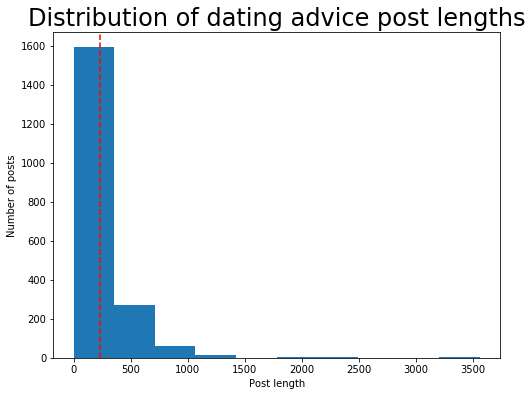

In [58]:
fig = plt.figure(figsize=(8, 6)) 
plt.xlabel('Post length')
plt.ylabel('Number of posts')
plt.hist(post_length)

mean_words = sum(post_length)/full_dating.shape[0]
plt.axvline(mean_words, color='r', linestyle='--')
plt.title('Distribution of dating advice post lengths', fontsize=24)
plt.show();

These histograms show me that the dating subreddit title and post lengths are not normally distributed.

The average number of words per post on the dating advice subreddit is 222.

In [59]:
full_dating.describe()

,num_comments,ups
count,1949.000000,1949.000000
mean,9.016419,24.347871
std,24.776780,220.516353
min,1.000000,0.000000
25%,3.000000,1.000000
50%,5.000000,1.000000
75%,8.000000,3.000000
max,416.000000,3920.000000


In [81]:
def get_top_n_words(corpus, n=None):
    cvec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#code adapted from https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [63]:
common_titles = get_top_n_words(full_dating['title'], 20)
for word, freq in common_titles:
    print(word, freq)



girl 210
dating 203
date 199
like 119
know 109
don 105
advice 103
guy 94
relationship 90
help 88
want 76
ve 76
need 75
just 69
ask 69
really 67
time 62
friend 61
women 61
people 56


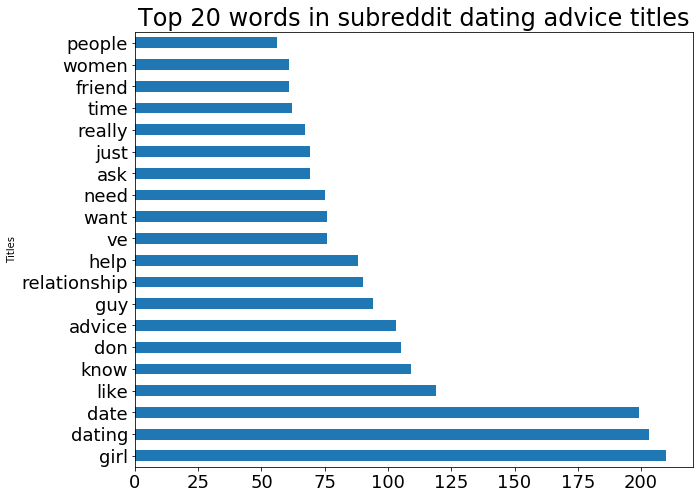

In [64]:
title_df = pd.DataFrame(common_titles, columns=['Titles', 'count'])
plt.figure(figsize=(10,8))
title_df.groupby('Titles').sum()['count'].sort_values(ascending=False).plot(kind='barh', fontsize=18)
plt.title("Top 20 words in subreddit dating advice titles", fontsize=24);

In [65]:
list(title_df['Titles'])

['girl',
 'dating',
 'date',
 'like',
 'know',
 'don',
 'advice',
 'guy',
 'relationship',
 'help',
 'want',
 've',
 'need',
 'just',
 'ask',
 'really',
 'time',
 'friend',
 'women',
 'people']

In [66]:
common_words = get_top_n_words(full_dating['selftext'], 20)
for word, freq in common_words:
    print(word, freq)

just 2557
like 2480
don 1778
ve 1735
know 1721
really 1697
time 1604
want 1407
said 1136
feel 1122
date 1027
girl 1027
relationship 915
friends 909
think 873
didn 864
things 858
guy 858
dating 826
going 797


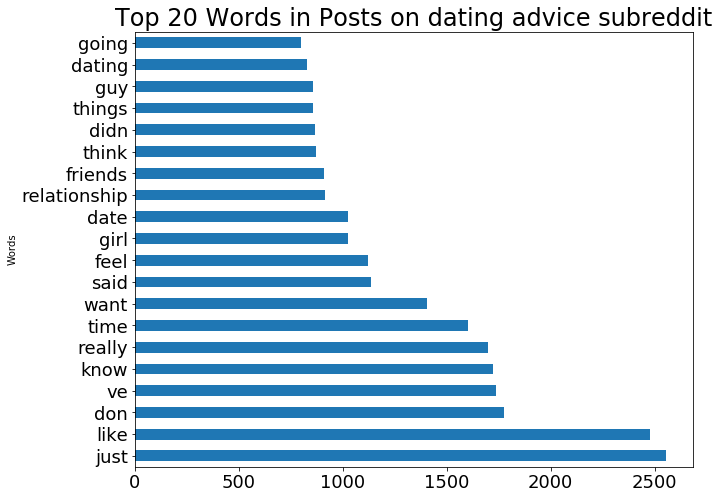

In [67]:
pop_words = pd.DataFrame(common_words, columns=['Words', 'count'])
plt.figure(figsize=(10,8))
pop_words.groupby('Words').sum()['count'].sort_values(ascending=False).plot(kind='barh', fontsize=18)
plt.title("Top 20 Words in Posts on dating advice subreddit", fontsize=24);

Load in the relationship csv to concat with 

In [69]:
train = pd.read_csv('datasets/more_train.csv')

In [70]:
train.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [71]:
train.head()

,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,caomx7,aspicer101,My 26yr old GF that has OCD with staring compu...,This is my first time dating a person with OCD...,2019-07-08 18:12:14,0,1,relationship_advice
1,caomuh,Tiathomas,Best friend becomes lover,Hi ! I have fallen in love with my childhood b...,2019-07-08 18:12:05,0,1,relationship_advice
2,caomsk,emstyler,I (30M) think I made a humongous mistake break...,I think I could use some help with clarity her...,2019-07-08 18:11:59,0,1,relationship_advice
3,caoml0,bf_advice_throwaway,24 F relationship with 23 M ended suddenly. I ...,I do not know how to navigate the plethora of ...,2019-07-08 18:11:30,0,1,relationship_advice
4,caomf8,ilovesocksalot,Wife was raped while cheating,I found out about three ago that my wife cheat...,2019-07-08 18:11:13,1,1,relationship_advice


In [72]:
train = pd.concat(objs=[dating_2, train], axis='rows', ignore_index=True)

In [73]:
train.shape

(3878, 8)

Save to one final big csv

In [80]:
# train.to_csv('datasets/big_train.csv')
# commented out so it doesn't save over original when the notebook is rerun.

In [75]:
%ls

README.md                         reddit-NLP.ipynb
datasets/                         relationship-advice-scrape.ipynb
dating-advice-scrape.ipynb


In [76]:
train['id'].value_counts().head()

ca97ub    2
ca8vpe    2
ca9u0h    2
ca9dmy    2
ca9w63    2
Name: id, dtype: int64

In [77]:
train.drop_duplicates(subset='id', inplace=True)

In [78]:
train.shape

(3845, 8)

In [79]:
train.isnull().sum()

id              0
author          0
title           0
selftext        5
timestamp       0
num_comments    0
ups             0
subreddit       0
dtype: int64